In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [78]:
univariate_column_label=['DEWIHOBT9_I0','AEDAHO_T9_V2','AEWIHO_T9AV2']

In [79]:
size_column = len(univariate_column_label)
print(size_column)

3


In [80]:
univariate_data=test_new.iloc[2000:7000][univariate_column_label]
univariate_data=univariate_data.loc[::-1]
print(univariate_data.head())

                     DEWIHOBT9_I0  AEDAHO_T9_V2  AEWIHO_T9AV2
dateTime                                                     
2019-04-06 00:21:00         100.0     72.427071     76.598087
2019-04-06 00:22:00         100.0     71.620643     76.358689
2019-04-06 00:23:00         100.0     70.606738     77.241097
2019-04-06 00:24:00         100.0     70.531626     77.062413
2019-04-06 00:25:00         100.0     70.692115     76.297974


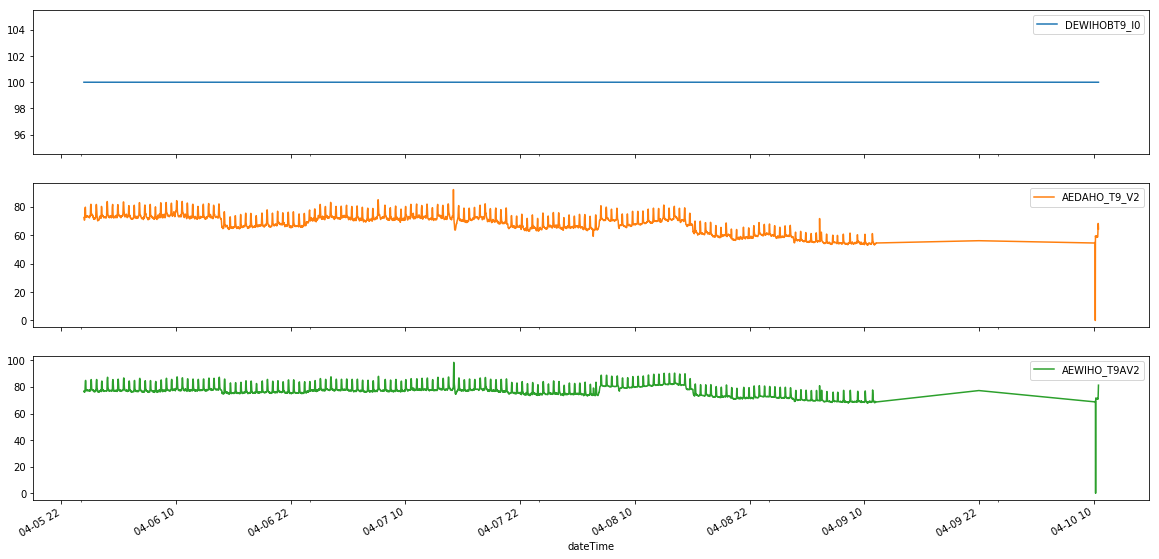

In [81]:
ax = univariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
# plt.savefig('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/images_from_training/multivariate_data_regression.png')
# plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [82]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in univariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  0


In [83]:
if zero_index.size > 0:
    univariate_data_modify = univariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    univariate_data_modify = univariate_data

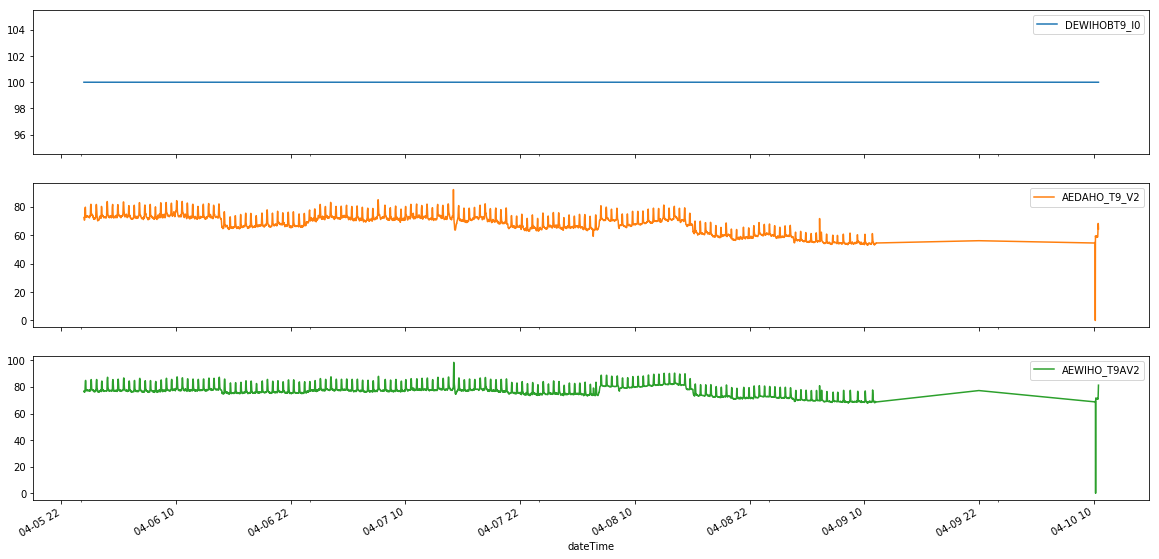

In [84]:
bx = univariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [21]:
univariate_data_1= univariate_data_modify.drop(['DEWIHOBT9_I0','AEWIHO_T9AV2'], axis=1)
univariate_data_2= univariate_data_modify.drop(['DEWIHOBT9_I0','AEDAHO_T9_V2'], axis=1)

In [22]:
print('univariate_data_1 head: \n',univariate_data_1.head())
print('univariate_data_2 head: \n',univariate_data_2.head())

univariate_data_1 head: 
                      AEDAHO_T9_V2
dateTime                         
2019-04-06 00:21:00     72.427071
2019-04-06 00:22:00     71.620643
2019-04-06 00:23:00     70.606738
2019-04-06 00:24:00     70.531626
2019-04-06 00:25:00     70.692115
univariate_data_2 head: 
                      AEWIHO_T9AV2
dateTime                         
2019-04-06 00:21:00     76.598087
2019-04-06 00:22:00     76.358689
2019-04-06 00:23:00     77.241097
2019-04-06 00:24:00     77.062413
2019-04-06 00:25:00     76.297974


# Replace zero'0' value with NAN and then drop those rows

In [23]:
from numpy import nan
univariate_data_drop_zero_1 = univariate_data_1.replace(0,nan)
univariate_data_drop_zero_1 = univariate_data_drop_zero_1.dropna(how='any',axis=0)

univariate_data_drop_zero_2 = univariate_data_2.replace(0,nan)
univariate_data_drop_zero_2 = univariate_data_drop_zero_2.dropna(how='any',axis=0)

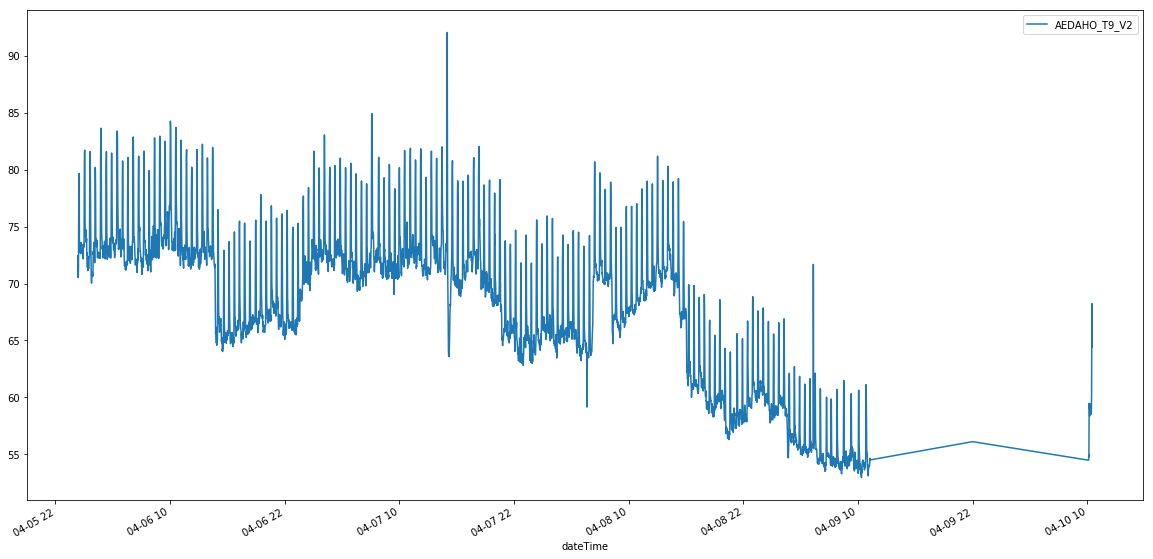

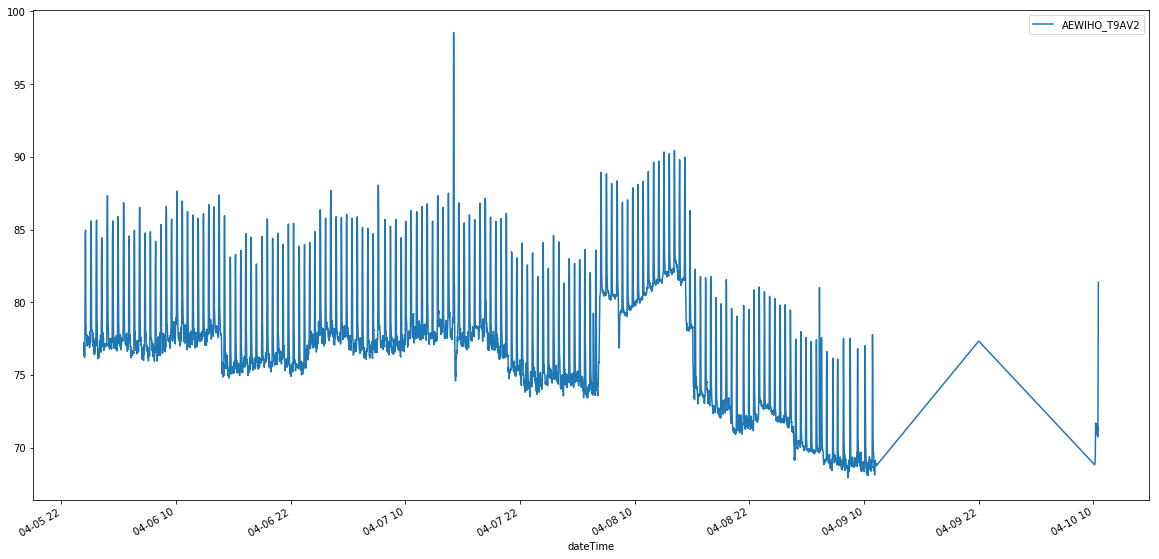

In [24]:
cx = univariate_data_drop_zero_1.plot()
dx = univariate_data_drop_zero_2.plot()
# plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# Function for making dataset for feeding in the MODEL. Just change the argument for working with the another dataframe
##here, 2 dataframe has used and they are
##univariate_data_drop_zero_1
##univariate_data_drop_zero_2

In [47]:
def make_dataset(PandaDataframe):
    dataset = np.array(PandaDataframe)

    NumberOfElements = int(len(dataset)*0.9)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    train_data = dataset[0:NumberOfElements]
    test_data = dataset[NumberOfElements:len(dataset)]
    
    return train_data, test_data

train_data_vanilla, test_data_vanilla = make_dataset(univariate_data_drop_zero_2)
print('train_data_vanilla shape: ', train_data_vanilla.shape)
print('test_data_vanilla shape: ', test_data_vanilla.shape)

dataset length:  4999
Number of Elements for training:  4499
train_data_vanilla shape:  (4499, 1)
test_data_vanilla shape:  (500, 1)


# function for making train and test dataset suitable for VANILLA LSTM 

In [48]:
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    print(len(sequence))
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [49]:
# choose a number of time steps
n_steps = 1
# split into samples
X_train_vanilla, y_train_vanilla = split_sequence(train_data_vanilla, n_steps)
# print(X.shape,'\t',X.ndim,'\t',X.size)
# print(y.shape,'\t',y.ndim,'\t',y.size)
print(X_train_vanilla.shape,'\t',X_train_vanilla.ndim,'\t',X_train_vanilla.size)
print(y_train_vanilla.shape,'\t',y_train_vanilla.ndim,'\t',y_train_vanilla.size)
# summarize the data
# for i in range(len(X)):
# 	print(X[i], y[i])

4499
(4498, 1, 1) 	 3 	 4498
(4498, 1) 	 2 	 4498


In [50]:
n_features = X_train_vanilla.shape[-1]
X_train_vanilla = X_train_vanilla.reshape((X_train_vanilla.shape[0], X_train_vanilla.shape[1], n_features))

In [51]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [52]:

lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs=30

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
train_model=model.fit(X_train_vanilla, y_train_vanilla, batch_size=batch_size, epochs=epochs,verbose=1,
          callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/vanilla_100.h5', save_best_only=True)])


Epoch 1/30
4498/4498 [==============================] - 1s 254us/step - loss: 334.5733 - acc: 0.0000e+00
Epoch 2/30
2592/4498 [================>.............] - ETA: 0s - loss: 1.7252 - acc: 0.0000e+00

C:\Users\atif\Anaconda3\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


4498/4498 [==============================] - 0s 64us/step - loss: 1.7409 - acc: 0.0000e+00
Epoch 3/30
4498/4498 [==============================] - 0s 63us/step - loss: 1.7268 - acc: 0.0000e+00
Epoch 4/30
4498/4498 [==============================] - 0s 66us/step - loss: 1.7360 - acc: 0.0000e+00
Epoch 5/30
4498/4498 [==============================] - 0s 62us/step - loss: 1.7414 - acc: 0.0000e+00
Epoch 6/30
4498/4498 [==============================] - 0s 63us/step - loss: 1.7436 - acc: 0.0000e+00
Epoch 7/30
4498/4498 [==============================] - 0s 64us/step - loss: 1.7768 - acc: 0.0000e+00
Epoch 8/30
4498/4498 [==============================] - 0s 62us/step - loss: 1.7858 - acc: 0.0000e+00
Epoch 9/30
4498/4498 [==============================] - 0s 62us/step - loss: 1.7489 - acc: 0.0000e+00
Epoch 10/30
4498/4498 [==============================] - 0s 61us/step - loss: 1.7753 - acc: 0.0000e+00
Epoch 11/30
4498/4498 [==============================] - 0s 61us/step - loss: 1.7280 - acc: 

In [53]:
test_ip_vanilla,test_op_vanilla=split_sequence(test_data_vanilla,n_steps)
n_features_test = test_ip_vanilla.shape[-1]
X_test_ip_vanilla=test_ip_vanilla.reshape((test_ip_vanilla.shape[0], test_ip_vanilla.shape[1], n_features_test))

500


In [54]:
yhat = model.predict(X_test_ip_vanilla, verbose=1)

499/499 [==============================] - 0s 365us/step


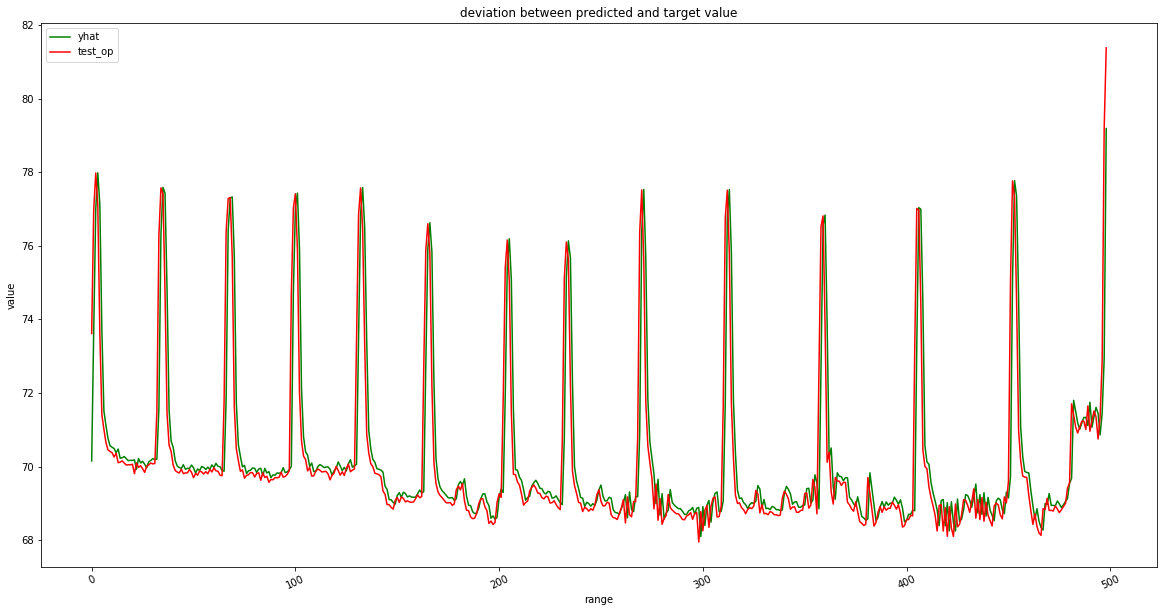

In [55]:
plt.plot(yhat,color='green')
plt.plot(test_op_vanilla,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['yhat', 'test_op'], loc='upper left')
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_op_vanilla,yhat)
print(Error)

1.4193508889194584
